In [50]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt



In [51]:
df = pd.read_csv("loan.csv")

Explore the dataset

In [52]:
df.head

<bound method NDFrame.head of     age  gender    occupation education_level marital_status  income  \
0    32    Male      Engineer      Bachelor's        Married   85000   
1    45  Female       Teacher        Master's         Single   62000   
2    28    Male       Student     High School         Single   25000   
3    51  Female       Manager      Bachelor's        Married  105000   
4    36    Male    Accountant      Bachelor's        Married   75000   
..  ...     ...           ...             ...            ...     ...   
56   39    Male     Architect        Master's        Married  100000   
57   25  Female  Receptionist     High School         Single   32000   
58   43    Male        Banker      Bachelor's        Married   95000   
59   30  Female        Writer        Master's         Single   55000   
60   38    Male          Chef     Associate's        Married   65000   

    credit_score loan_status  
0            720    Approved  
1            680    Approved  
2           

In [53]:
df.info

<bound method DataFrame.info of     age  gender    occupation education_level marital_status  income  \
0    32    Male      Engineer      Bachelor's        Married   85000   
1    45  Female       Teacher        Master's         Single   62000   
2    28    Male       Student     High School         Single   25000   
3    51  Female       Manager      Bachelor's        Married  105000   
4    36    Male    Accountant      Bachelor's        Married   75000   
..  ...     ...           ...             ...            ...     ...   
56   39    Male     Architect        Master's        Married  100000   
57   25  Female  Receptionist     High School         Single   32000   
58   43    Male        Banker      Bachelor's        Married   95000   
59   30  Female        Writer        Master's         Single   55000   
60   38    Male          Chef     Associate's        Married   65000   

    credit_score loan_status  
0            720    Approved  
1            680    Approved  
2         

In [54]:
print("Data Shape:: ", df.shape)

Data Shape::  (61, 8)


In [55]:
print("DataSet Length:: ", len(df))

DataSet Length::  61


Independent(X) and Dependent Variable(Y)

In [56]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in X.columns:
    X[column] = le.fit_transform(X[column])

Y = le.fit_transform(Y)


Train test split


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42 )

In [59]:
X_train.shape
X_test.shape

(19, 7)

Building the model

In [60]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, Y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Evaluating the model

In [65]:
Y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", metrics.classification_report(Y_test, Y_pred))

Accuracy: 0.9473684210526315

Confusion Matrix:
 [[14  1]
 [ 0  4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.80      1.00      0.89         4

    accuracy                           0.95        19
   macro avg       0.90      0.97      0.93        19
weighted avg       0.96      0.95      0.95        19



Vizualization of the Decision Tree

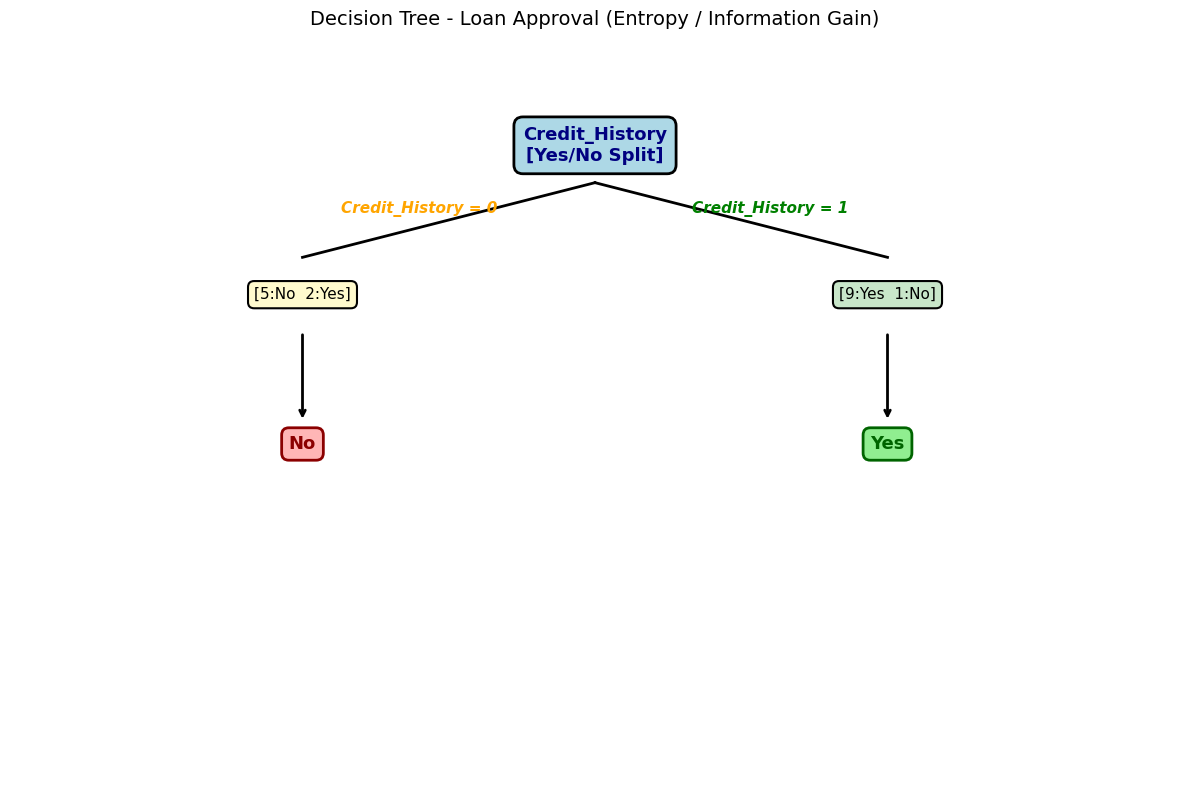

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("off")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Root node
root_y = 0.85
ax.text(0.5, root_y, "Credit_History\n[Yes/No Split]", ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.5", facecolor="#ADD8E6", edgecolor="black", lw=2),
        fontsize=13, fontweight="bold", color="navy")

# Branch positions
left_x = 0.25
right_x = 0.75
branch_y = 0.65
leaf_y = 0.45

# Arrows from root to children
ax.plot([0.5, left_x], [root_y - 0.05, branch_y + 0.05], 'k-', lw=2)
ax.plot([0.5, right_x], [root_y - 0.05, branch_y + 0.05], 'k-', lw=2)

# Branch labels on arrows
ax.text(0.35, 0.76, "Credit_History = 0", color="orange", fontsize=11, 
        fontweight="bold", ha="center", style='italic')
ax.text(0.65, 0.76, "Credit_History = 1", color="green", fontsize=11, 
        fontweight="bold", ha="center", style='italic')

# Left branch: Credit_History = 0
ax.text(left_x, branch_y, "[5:No  2:Yes]", ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.4", facecolor="#FFFACD", edgecolor="black", lw=1.5),
        fontsize=11)

# Arrow to left leaf
ax.annotate('', xy=(left_x, leaf_y + 0.03), xytext=(left_x, branch_y - 0.05),
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

ax.text(left_x, leaf_y, "No", ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.4", facecolor="#FFB6B6", edgecolor="darkred", lw=2),
        fontsize=13, fontweight="bold", color="darkred")

# Right branch: Credit_History = 1
ax.text(right_x, branch_y, "[9:Yes  1:No]", ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.4", facecolor="#C8E6C9", edgecolor="black", lw=1.5),
        fontsize=11)

# Arrow to right leaf
ax.annotate('', xy=(right_x, leaf_y + 0.03), xytext=(right_x, branch_y - 0.05),
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

ax.text(right_x, leaf_y, "Yes", ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.4", facecolor="#90EE90", edgecolor="darkgreen", lw=2),
        fontsize=13, fontweight="bold", color="darkgreen")

plt.title("Decision Tree - Loan Approval (Entropy / Information Gain)", fontsize=14)
plt.tight_layout()
plt.show()

In [68]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


           Feature  Importance
6     credit_score         1.0
1           gender         0.0
0              age         0.0
2       occupation         0.0
3  education_level         0.0
4   marital_status         0.0
5           income         0.0
